# Rossman Store Sales Optimization

In [1]:
#Importing required packages
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
# Loading the data
df = pd.read_csv('train.csv')

C:\Users\kkere\AppData\Local\Temp\ipykernel_22864\2598957197.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [5]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
#Checking for null values
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
# Extract the day, month, and year from the 'Date' column
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [8]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1


In [9]:
#Dropping 'Store' and 'Date'
df = df.drop('Store', axis=1)
df = df.drop('Date', axis=1)

In [10]:
df

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,5,5263,555,1,1,0,1,2015,7
1,5,6064,625,1,1,0,1,2015,7
2,5,8314,821,1,1,0,1,2015,7
3,5,13995,1498,1,1,0,1,2015,7
4,5,4822,559,1,1,0,1,2015,7
...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,0,a,1,2013,1
1017205,2,0,0,0,0,a,1,2013,1
1017206,2,0,0,0,0,a,1,2013,1
1017207,2,0,0,0,0,a,1,2013,1


In [11]:
# Converting categorical variables 'StateHoliday' into dummy variables
df = pd.get_dummies(df, columns=['StateHoliday'], drop_first=True)

## Checking the correlation

In [28]:
# Calculate the Pearson correlation matrix
corr_matrix = df.corr()

# Sort the values in the target column (Sales)
corr_matrix.sort_values("Sales", ascending=False, inplace=True)

# Print the sorted correlation matrix
print(corr_matrix)

                DayOfWeek     Sales  Customers      Open     Promo  \
Sales           -0.462125  1.000000   0.894711  0.678472  0.452345   
Customers       -0.386445  0.894711   1.000000  0.616768  0.316169   
Open            -0.528963  0.678472   0.616768  1.000000  0.295042   
Promo           -0.392925  0.452345   0.316169  0.295042  1.000000   
StateHoliday_0   0.029062  0.123160   0.099656  0.153969  0.007923   
SchoolHoliday   -0.205388  0.085124   0.071568  0.086171  0.067483   
Month           -0.005362  0.048768   0.038179 -0.000681 -0.011747   
Year             0.001937  0.023519  -0.001212 -0.001009  0.024300   
StateHoliday_c  -0.001345 -0.092618  -0.083007 -0.137685 -0.049964   
StateHoliday_b  -0.040668 -0.117497  -0.104522 -0.175158  0.019847   
StateHoliday_a  -0.040981 -0.203028  -0.180900 -0.302107 -0.004034   
DayOfWeek        1.000000 -0.462125  -0.386445 -0.528963 -0.392925   

                SchoolHoliday      Year     Month  StateHoliday_0  \
Sales               

In [35]:
# Split the data into training and testing sets
predictors = df.drop('Sales', axis=1)
target = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)

In [36]:
#Scaling the data
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

## MLP Regressor

In [37]:
# Train the MLP Regressor model
mlp = MLPRegressor(hidden_layer_sizes=(10,10,10), max_iter=1000, random_state = 0)
mlp.fit(trainX_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=0)

In [41]:
#Testing MLP Regressor Accuracy
mlp_regressor_predictions = mlp.predict(testX_scaled)
mlp_mse = mean_squared_error(y_test, mlp_regressor_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_regressor_predictions)

mean_sales = y_test.mean()

print(f"MLP Regressor MSE: {mlp_mse}")
print(f"MLP Regressor MAE: {mlp_mae}")
print(f"Mean of Sales for Test data: {mean_sales:.2f}")
print("Mean of Predictions:", mlp_regressor_predictions.mean())

MLP Regressor MSE: 1743288.3819121746
MLP Regressor MAE: 872.2599196803241
Mean of Sales for Test data: 5755.48
Mean of Predictions: 5750.354407327698


In [69]:
#Finding the most important feature and its optimal value
importances = mlp.coefs_[0].flatten()
n_features = testX_scaled.shape[1]
most_important_feature = predictors.columns[np.argmax(importances) % n_features]
optimal_value = df[most_important_feature].max()
print("The most important feature is:", most_important_feature)
print("The optimal value is:", optimal_value)

The most important feature is: Customers
The optimal value is: 7388


# Model Validation

### Checking Residuals

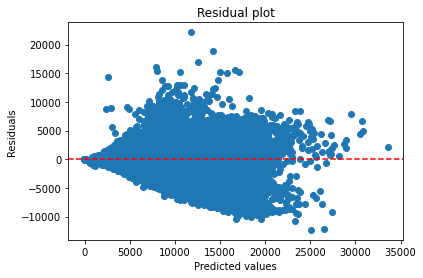

In [44]:
#Plotting the residuals
residuals = y_test - mlp_regressor_predictions

plt.scatter(mlp_regressor_predictions, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual plot')
plt.show()

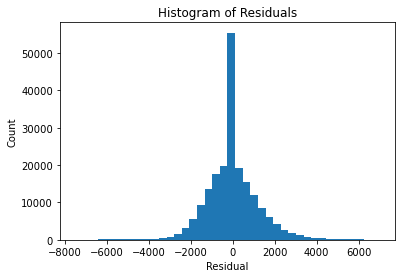

In [48]:
#Plotting the residuals
plt.hist(residuals, bins=40, range=(-7500, 7000))
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Histogram of Residuals')
plt.show()

### Residuals are close to a Normal Distribution.

In [54]:
mask = (residuals > 2000) | (residuals < -2000)
filtered_test_data = X_test[mask]

# Get the predicted and actual sales values for the filtered test data
filtered_predictions = mlp_regressor_predictions[mask]
filtered_actual = y_test[mask]

# Combine the filtered predictions and actual sales values into a DataFrame
filtered_results = pd.DataFrame({'predicted': filtered_predictions, 'actual': filtered_actual})

# Display the filtered results
print(filtered_results)

           predicted  actual
596415  10767.868168    6083
479017  14007.112252    5680
247685  12034.209388    9019
771228   6362.203463    9591
873162   7986.512571   14826
...              ...     ...
874937   6491.525158    8745
416566   6259.925300    8791
638462  16032.909474    7426
451142  13480.765817    6686
124290   9705.155711    7011

[20616 rows x 2 columns]


In [56]:
filtered_test_data

,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Year,Month,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
596415,1,1548,1,0,0,2014,1,1,0,0,0
479017,1,1537,1,1,0,2014,4,1,0,0,0
247685,5,1221,1,1,0,2014,12,1,0,0,0
771228,5,743,1,0,1,2013,8,1,0,0,0
873162,5,1013,1,0,0,2013,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
874937,3,845,1,0,0,2013,5,1,0,0,0
416566,1,756,1,0,0,2014,6,1,0,0,0
638462,5,1838,1,1,0,2013,12,1,0,0,0
451142,5,1752,1,1,0,2014,5,1,0,0,0


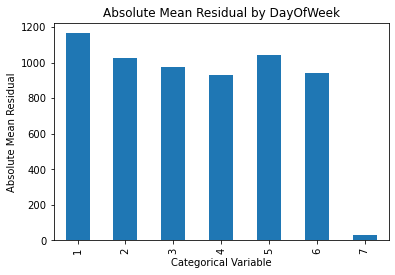

In [68]:
# Create a data frame of residuals and categorical variable
df_residuals = pd.DataFrame({'residuals': residuals, 'DayOfWeek': X_test['DayOfWeek']})

# Group the data frame by the categorical variable
grouped = df_residuals.groupby('DayOfWeek')

# Calculate the absolute mean residual for each group
mean_abs_residuals = grouped['residuals'].apply(lambda x: x.abs().mean())

# Plot the absolute mean residuals for each group
mean_abs_residuals.plot.bar()
plt.xlabel('Categorical Variable')
plt.ylabel('Absolute Mean Residual')
plt.title('Absolute Mean Residual by DayOfWeek')
plt.show()

# Distributions of Sales for Optimization

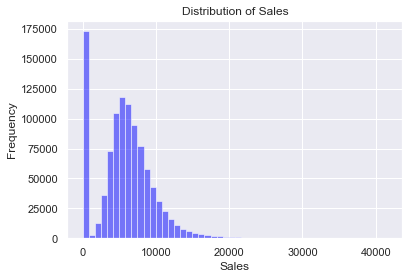

In [78]:
#Distribution of Sales

# Plot the distribution of Sales using a histogram
plt.hist(df['Sales'], bins=50, color='blue', alpha=0.5)

# Add labels and title to the plot
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')

# Show the plot
plt.show()

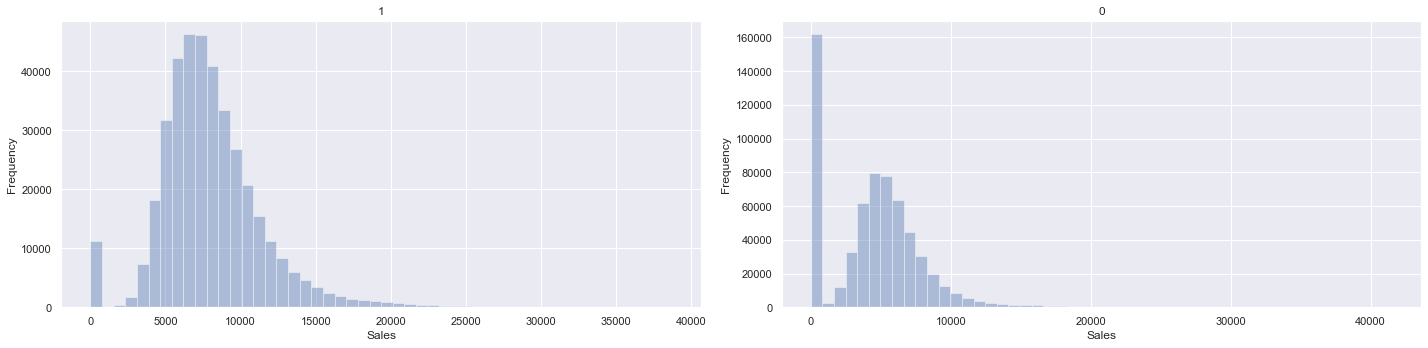

In [75]:
#Distribution of Sales vs Promo

sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
for i, day in enumerate(df['Promo'].unique()):
    sns.distplot(df[df['Promo'] == day]['Sales'], ax=axs[i], kde=False, rug=False)
    axs[i].set_title(day)
    axs[i].set_xlabel('Sales')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# <span style="color:red">Method 1</span>

## Promo vs StateHoliday

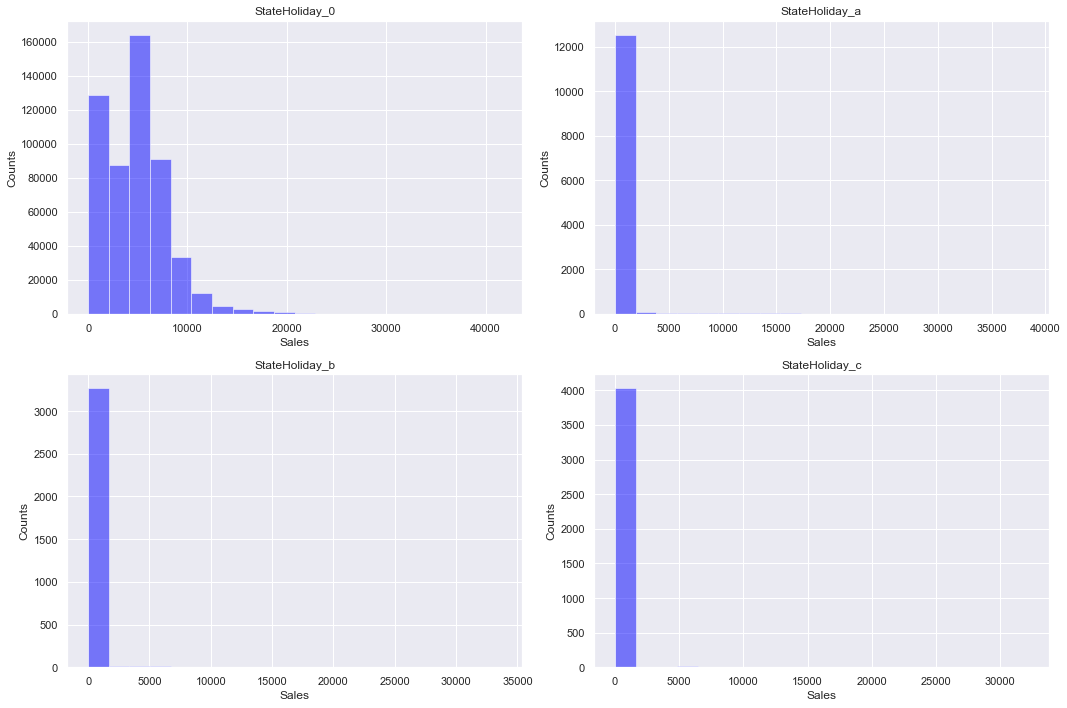

In [79]:
#Sales distribution of StateHoliday when there is no promotion

# Get the data where Promo = 0
data_promo0 = df[df['Promo'] == 0]

# Plot the distribution of Sales for each StateHoliday dummy variable
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.ravel()
for i, holiday in enumerate(['StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c']):
    ax[i].hist(data_promo0.loc[data_promo0[holiday] == 1, 'Sales'], bins=20, color='blue', alpha=0.5, label=holiday)
    ax[i].set_title(holiday)
    ax[i].set_xlabel('Sales')
    ax[i].set_ylabel('Counts')
plt.tight_layout()
plt.show()

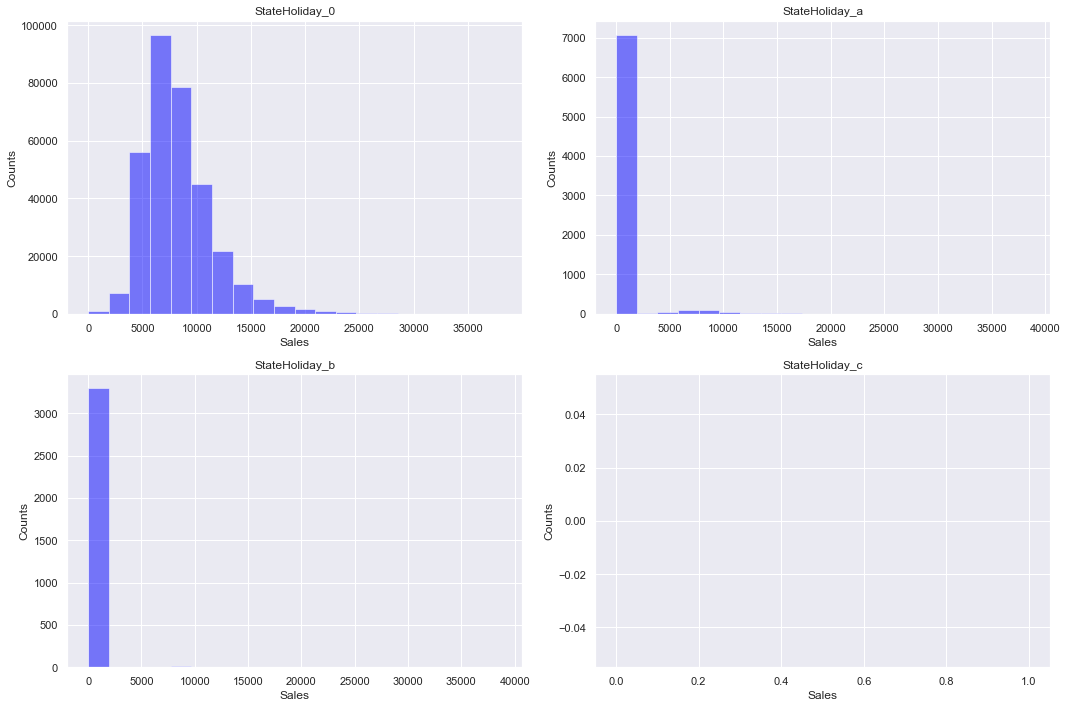

In [81]:
#Sales distribution of StateHoliday when there is a promotion

# Get the data where Promo = 1
data_promo1 = df[df['Promo'] == 1]

# Plot the distribution of Sales for each StateHoliday dummy variable
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.ravel()
for i, holiday in enumerate(['StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c']):
    ax[i].hist(data_promo1.loc[data_promo1[holiday] == 1, 'Sales'], bins=20, color='blue', alpha=0.5, label=holiday)
    ax[i].set_title(holiday)
    ax[i].set_xlabel('Sales')
    ax[i].set_ylabel('Counts')
plt.tight_layout()
plt.show()

### Approach
#### 1- Counting the total number of promotions applied on StateHoliday = a, b, or c
#### 2- Removing promotions for StateHoliday = a, b, or c
#### 3- Applying promotions for StateHoliday = 0 randomly by the total amount calculated in Step 1

In [87]:
# Count the number of lines where Promo = 1 and StateHoliday = a, b, or c
total_number_promo = np.sum((X_test['Promo'] == 1) & ((X_test['StateHoliday_a'] == 1) | 
                                                      (X_test['StateHoliday_b'] == 1) | 
                                                      (X_test['StateHoliday_c'] == 1)))

# Assign changes in X_test to a new variable
X_test_modified = X_test.copy()

# Change Promo = 1 to Promo = 0 where StateHoliday = a, b, or c
X_test_modified.loc[(X_test['Promo'] == 1) & ((X_test['StateHoliday_a'] == 1) | 
                                              (X_test['StateHoliday_b'] == 1) | 
                                              (X_test['StateHoliday_c'] == 1)), 'Promo'] = 0

In [97]:
# Get the indices where Promo = 0 and StateHoliday_0 = 1
promo_0_index = X_test_modified[(X_test_modified['Promo'] == 0) & (X_test_modified['StateHoliday_0'] == 1)].index

# Randomly select `total_number_promo` indices from `promo_0_index`
random_index = random.sample(list(promo_0_index), total_number_promo)

# Create a new dataframe with the selected indices
#X_test_revised = X_test.copy()
X_test_modified.loc[random_index, 'Promo'] = 1

### Comparison

In [99]:
#Scaling new test dataset before predictions

sc=StandardScaler()

new_testX_scaled = scaler.transform(X_test_modified)

In [104]:
new_y_pred = mlp.predict(new_testX_scaled)
print("Mean of First Predictions: ", mlp_regressor_predictions.mean())
print("Mean of New Predictions:", new_y_pred.mean())

Mean of New Predictions: 5758.3074198832255
Mean of First Predictions:  5750.354407327698


Median of y_test: 5731.0


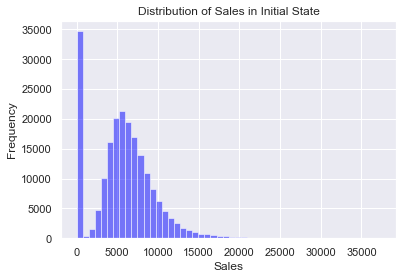

In [110]:
median = np.median(y_test)
print("Median of y_test:", median)

plt.hist(y_test, bins=50, color='blue', alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales in Initial State")
plt.show()

Median of y_test: 5906.944680587973


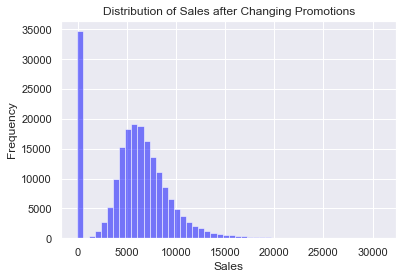

In [109]:
median = np.median(new_y_pred)
print("Median of y_test:", median)

plt.hist(new_y_pred, bins=50, color='blue', alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales after Changing Promotions")
plt.show()

### 3% improvement after the implementation.

# <span style="color:red">Method 2</span>

## Promo vs DayOfWeek

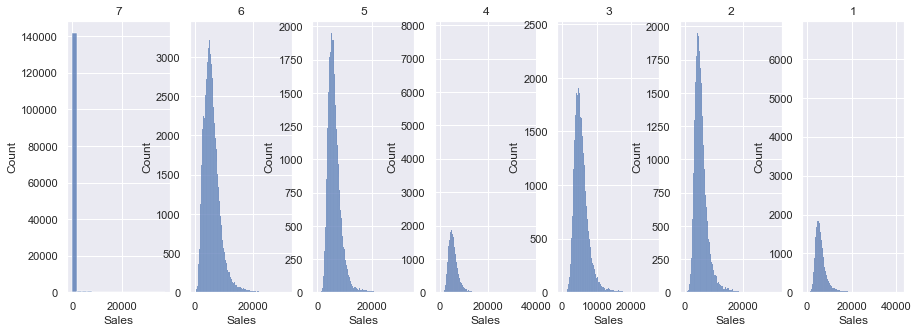

In [85]:
##Sales distribution of DayOfWeek when there is NO promotion

# Create a list of days of the week
days = data_promo0['DayOfWeek'].unique()

# Create a figure with 7 subplots, one for each day of the week
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15,5))

# Loop through each day of the week
for i, day in enumerate(days):
    # Filter data to only include instances for the current day
    data_day = data_promo0[data_promo0['DayOfWeek'] == day]
    
    # Plot the distribution of Sales for the current day in the corresponding subplot
    sns.histplot(data_day['Sales'], ax=axes[i])
    
    # Add a title to the subplot with the name of the current day
    axes[i].set_title(day)
    
# Show the plot
plt.show()

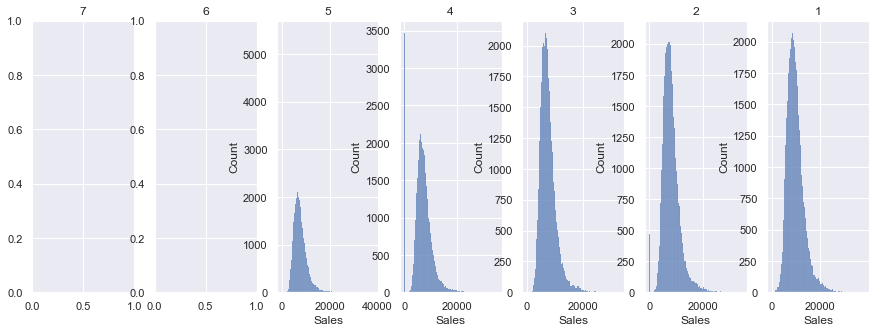

In [86]:
##Sales distribution of DayOfWeek when there is A promotion

# Create a figure with 7 subplots, one for each day of the week
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15,5))

# Loop through each day of the week
for i, day in enumerate(days):
    # Filter data to only include instances for the current day
    data_day = data_promo1[data_promo1['DayOfWeek'] == day]
    
    # Plot the distribution of Sales for the current day in the corresponding subplot
    sns.histplot(data_day['Sales'], ax=axes[i])
    
    # Add a title to the subplot with the name of the current day
    axes[i].set_title(day)
    
# Show the plot
plt.show()

### Approach
#### 1- Counting the total number of promotions applied on DayOfWeek = 5
#### 2- Removing promotions for DayOfWeek = 5
#### 3- Applying promotions for DayOfWeek = 1, 4 (least amount of sales) randomly by the total amount calculated in Step 1

In [114]:
# Count the number of lines where Promo = 1 and DayOfWeek = 5
total_number_promo_2 = np.sum((X_test['Promo'] == 1) & ((X_test['DayOfWeek'] == 5)))

# Assign changes in X_test to a new variable
X_test_modified_2 = X_test.copy()

# Change Promo = 1 to Promo = 0 where DayOfWeek = 5
X_test_modified_2.loc[(X_test['Promo'] == 1) & ((X_test['DayOfWeek'] == 5)), 'Promo'] = 0

In [119]:
# Get the indices where Promo = 0 and DayOfWeek = 4, or 1
promo_0_index_2 = X_test_modified_2[(X_test_modified_2['Promo'] == 0) & (X_test_modified_2['DayOfWeek'] == 4) | 
                                                      (X_test_modified_2['DayOfWeek'] == 1)].index

# Randomly select `total_number_promo` indices from `promo_0_index`
random_index_2 = random.sample(list(promo_0_index_2), total_number_promo_2)

# Create a new dataframe with the selected indices
X_test_modified_2.loc[random_index_2, 'Promo'] = 1

### Comparison

In [120]:
#Scaling new test dataset before predictions

sc=StandardScaler()

new_testX_scaled_2 = scaler.transform(X_test_modified_2)

In [121]:
new_y_pred_2 = mlp.predict(new_testX_scaled_2)
print("Mean of First Predictions: ", mlp_regressor_predictions.mean())
print("Mean of New Predictions:", new_y_pred_2.mean())

Mean of First Predictions:  5750.354407327698
Mean of New Predictions: 5752.072678653643


Median of y_test: 5731.0


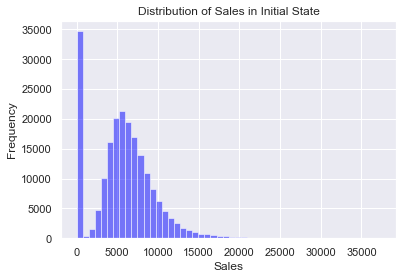

In [123]:
median = np.median(y_test)
print("Median of y_test:", median)

plt.hist(y_test, bins=50, color='blue', alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales in Initial State")
plt.show()

Median of y_test: 5901.512765856156


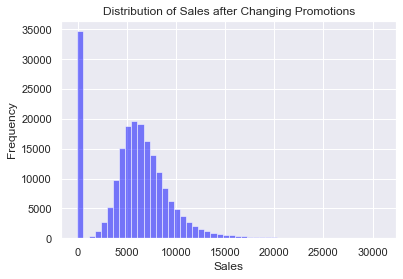

In [122]:
median = np.median(new_y_pred_2)
print("Median of y_test:", median)

plt.hist(new_y_pred_2, bins=50, color='blue', alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales after Changing Promotions")
plt.show()

### 3% improvement after the implementation.

# <span style="color:red">Method 3: Combining the methods</span>

In [124]:
# Count the number of lines where Promo = 1 and DayOfWeek = 5
total_number_promo_3 = np.sum((X_test_modified['Promo'] == 1) & ((X_test_modified['DayOfWeek'] == 5)))

# Assign changes in X_test to a new variable
X_test_modified_3 = X_test_modified.copy()

# Change Promo = 1 to Promo = 0 where DayOfWeek = 5
X_test_modified_3.loc[(X_test_modified['Promo'] == 1) & ((X_test_modified['DayOfWeek'] == 5)), 'Promo'] = 0

In [125]:
# Get the indices where Promo = 0 and DayOfWeek = 4, or 1
promo_0_index_3 = X_test_modified_3[(X_test_modified_3['Promo'] == 0) & (X_test_modified_3['DayOfWeek'] == 4) | 
                                                      (X_test_modified_3['DayOfWeek'] == 1)].index

# Randomly select `total_number_promo` indices from `promo_0_index`
random_index_3 = random.sample(list(promo_0_index_3), total_number_promo_3)

# Create a new dataframe with the selected indices
X_test_modified_3.loc[random_index_3, 'Promo'] = 1

### Comparison

In [126]:
#Scaling new test dataset before predictions

sc=StandardScaler()

new_testX_scaled_3 = scaler.transform(X_test_modified_3)

In [127]:
new_y_pred_3 = mlp.predict(new_testX_scaled_3)
print("Mean of First Predictions: ", mlp_regressor_predictions.mean())
print("Mean of New Predictions:", new_y_pred_3.mean())

Mean of First Predictions:  5750.354407327698
Mean of New Predictions: 5755.551896302632


Median of y_test: 5903.289891445065


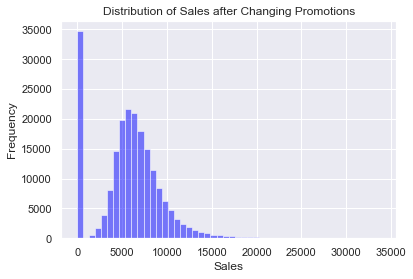

In [128]:
median = np.median(new_y_pred_3)
print("Median of y_test:", median)

plt.hist(new_y_pred_3, bins=50, color='blue', alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales after Changing Promotions")
plt.show()

## Applying two method at the same time <span style="color:red">did not </span>improve the sales as expected. Applying first method (shifting promotions from holiday) gave a better result and should be implemented.

# 

# Discussions and Recommendations
**Assumptions:** It is assumed that running a promotion costs a certain amount for Rossman. However, since we don’t know how much it costs, the goal is selected as keeping the number of promotions the same while increasing the sales revenue.  
- **Method 1.** Running promotions on public holidays, is not generating any significant revenue. Instead, those promotion budgets can be spent on non-holidays to boost sales. The total number of promotions is shifted from holidays randomly to regular days. A **3.05%** increase in sales is anticipated.

- **Method 2.** It is observed that promotion on Fridays is not contributing as much as in that day’s total revenue. Therefore, promotion is shifted from Fridays to Mondays and Thursdays with the least sales. A **2.96%** increase in sales is anticipated.

- **Method 3.** (Combination of Method 1 and 2). A **3%** increase in sales is anticipated.

## Method 1: Shifting promotions from holidays to non-holidays yields the most significant outcome, resulting in a 3.05% anticipated growth in sales.



# 

# Extra Coding for Testing #

## MLP Regressor without Customers variable

In [30]:
#Dropping customers column
# Split the data into training and testing sets
predictors_c =predictors.drop('Customers', axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors_c, target, test_size=0.2)

In [31]:
#Scaling the data
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [32]:
# Train the MLP Regressor model
mlp = MLPRegressor(hidden_layer_sizes=(10,10,10), max_iter=1000, random_state = 0)
mlp.fit(trainX_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=0)

In [33]:
#Testing MLP Regressor Accuracy
mlp_regressor_predictions = mlp.predict(testX_scaled)
mlp_mse = mean_squared_error(y_test, mlp_regressor_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_regressor_predictions)

mean_sales = y_test.mean()

print(f"MLP Regressor MSE: {mlp_mse}")
print(f"MLP Regressor MAE: {mlp_mae}")
print(f"Mean of Sales for Test data: {mean_sales:.2f}")

MLP Regressor MSE: 6335201.388452264
MLP Regressor MAE: 1647.53589365737
Mean of Sales for Test data: 5767.49


### Predicting Sales without Customers variable resulted in a higher error rate.

## Random Forest

### Random Forest algorithm ran as an alternative to MLP Regressor. However, MLP Regressor gave better prediction accuracy.

In [130]:
# Train the random forest regressor
regr = RandomForestRegressor(random_state = 0)
regr.fit(X_train, y_train)

# Get feature importances
importances = regr.feature_importances_
n_features = X_train.shape[1]

# Find the most important feature by taking the index of the maximum importance value
most_important_feature_index = np.argmax(importances)
most_important_feature = X_train.columns[most_important_feature_index % n_features]

print(f"The most important feature affecting sales is: {most_important_feature}")

The most important feature affecting sales is: Customers


In [139]:
# Testing Random Forest Accuracy
regr_predictions = regr.predict(X_test)
rf_mse = mean_squared_error(y_test, regr_predictions)
rf_mae = mean_absolute_error(y_test, regr_predictions)

print(f"Random Forest Regressor MSE: {rf_mse}")
print(f"Random Forest Regressor MAE: {rf_mae}")
print(f"Mean of Sales for Test data: {mean_sales:.2f}")

Random Forest Regressor MSE: 2174759.390585875
Random Forest Regressor MAE: 973.3657227013346
Mean of Sales for Test data: 5771.60


In [119]:
top_k = min(3, X_train.shape[1])
importances = rf.feature_importances_
top_k_indices = np.argsort(importances)[-min(len(importances), top_k):]
top_k_features = [X_train.columns[i] for i in top_k_indices]
print(f"The top {top_k} most important features affecting sales are: {top_k_features}")

The top 3 most important features affecting sales are: ['Month', 'Promo', 'Customers']


In [121]:
top_k = min(3, X_train.shape[1])
top_k_indices = np.argsort(importances)[-top_k:]
top_k_features = [X_train.columns[i] for i in top_k_indices]
print(f"The top {top_k} most important features affecting sales are: {top_k_features}")

The top 3 most important features affecting sales are: ['Month', 'Promo', 'Customers']
